
<h1>heart disease prediction using data mining</h1>
<h2>by Muhamed Hachoum , Kaggle</h2>

<h3>Framingham DataSet</h3>
Framingham Heart study dataset includes several demographic risk factors:-
sex: male or female;
age: age of the patient;
education: levels coded 1 for some high school, 2 for a high school diploma or GED, 3 for some college or vocational school, and 4 for a college degree.

The data set also includes behavioral risk factors associated with smoking
currentSmoker: whether or not the patient is a current smoker
cigsPerDay: the number of cigarettes that the person smoked on average in one day.

Medical history risk factors
BPMeds: whether or not the patient was on blood pressure medication
prevalentStroke: whether or not the patient had previously had a stroke
prevalentHyp: whether or not the patient was hypertensive
diabetes: whether or not the patient had diabetes

Risk factors from the first physical examination of the patient.

totChol: total cholesterol level
sysBP: systolic blood pressure
diaBP: diastolic blood pressure
BMI: Body Mass Index
heartRate: heart rate
glucose: glucose level
TenYearCHD: 10 year risk of coronary heart disease CHD

In [22]:
import warnings
warnings.filterwarnings('ignore')

%config IPCompleter.greedy=True

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree    


    
import seaborn as sns
sns.set(color_codes=True)

<h1 style="direction: rtl;"><span style="color: #008080;">التحليل الإستكشافي للبيانات </span></h1>
<h2 style="direction:rtl;text-align: right;"><span style="color: #333399;">التعرف على البيانات</span></h2>
<p style="text-align: right;">نص عادي</p>




<p style="text-align: right;">.heart_data.csv :قراءة البيانات الموجودة بالداتاسيت</p>




In [23]:
DataSet = pd.read_csv('heart_data.csv')

<p style="text-align: right;"><strong><span style="color: #333399;">: عينة من البيانات التي سنتعامل معها</span></strong></p>

In [24]:
DataSet.sample(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2519,1,41,1.0,0,0.0,0.0,0,0,0,181.0,125.0,79.0,19.09,60.0,70.0,0
1516,1,36,4.0,0,0.0,0.0,0,0,0,219.0,121.0,66.0,20.86,74.0,76.0,0
2367,0,57,4.0,0,0.0,NaN,0,1,0,328.0,181.0,112.5,27.05,85.0,94.0,1


<p style="text-align: right;"><strong><span style="color: #333399;">: عدد البيانات في كل عمود</span></strong></p>

In [25]:
DataSet.count()

male               4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

<p style="text-align: right;"><strong><span style="color: #333399;">: البيانات بالتفصيل</span></strong></p>


<p style="direction: rtl; text-align: right;">std : &nbsp;الانحراف المعياري (بالإنجليزية:&nbsp;<em>Standard</em>&nbsp;deviation)</p>
<p style="direction: rtl; text-align: right;">mean :&nbsp;<em>المتوسط الحسابي</em>، أو&nbsp;<em>الوسط الحسابي</em>، وأحياناً المعدّل (بالإنجليزية: arithmetic&nbsp;<em>mean</em>)&nbsp;&nbsp;</p>
<p style="direction: rtl; text-align: right;">count : عدد العناصر .</p>

In [26]:
DataSet.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<h4 style="direction: rtl;"><span style="color: #0000ff;">عدد قيم الـtarget وهو العمود الأخير باِطار البيانات TenYearCHD:</span></h4>
<p style="direction: rtl;">0 يشير الى الأشخاص الذين لم يصيبوا بمرض القلب التاجي في العشر سنوات الأخيرة .</p></br>
<p style="direction: rtl;">1 يشير الى الأشخاص الذين اُصيبوا بمرض القلب التاجي في العشر سنوات الأخيرة .</p>



In [27]:
DataSet.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<h2 style="direction:rtl;text-align: right;"><span style="color: #333399;">ترتيب البيانات واستعراضها</span></h2>


<p style="direction: rtl; text-align: right;">ازالة جميع البيانات التي توجد بها معلومات ناقصة</p>


In [28]:
DataSet = DataSet.dropna()

<p style="direction: rtl; text-align: right;">الآن أصبح عدد القيم الموجودة بكل الأعمدة متساوي:</p>


In [29]:
DataSet.count()

male               3658
age                3658
education          3658
currentSmoker      3658
cigsPerDay         3658
BPMeds             3658
prevalentStroke    3658
prevalentHyp       3658
diabetes           3658
totChol            3658
sysBP              3658
diaBP              3658
BMI                3658
heartRate          3658
glucose            3658
TenYearCHD         3658
dtype: int64

<h4 style="direction: rtl; text-align: right;"><strong><span style="color: #339966;">دراسة الحالة الاجتماعية للعينات :</span></strong></h4>
<h4 style="direction: rtl; text-align: right;">أولاً بناء اطار بيانات (جدول) للمعلومات الاجتماعية:&nbsp;</h4>

In [102]:
social_data =DataSet.loc[:,:"cigsPerDay"]
social_data['age_bin'] = pd.cut(DataSet['age'], [30, 40, 50,60,70], labels=['30 - 40', '40 - 50', '50 - 60','60-70'])
cat_social_data = social_data.copy()
cat_social_data['male'] = social_data['male'].replace({0: 'Female', 1: 'Male'})
cat_social_data['education'] = social_data['education'].replace({1: 'high school', 2: 'high school diploma or GED',3: 'college or vocational school', 4: 'college degree.'})
cat_social_data['currentSmoker'] = social_data['currentSmoker'].replace({0: 'smocker', 1: 'not smocker'})
cat_social_data.rename(columns={'male': 'gender'}, inplace=True)


<h4 style="direction: rtl; text-align: right;">عينة:&nbsp;</h4>

In [103]:
cat_social_data.sample(5)

,gender,age,education,currentSmoker,cigsPerDay,age_bin
897,Female,57,college or vocational school,not smocker,20.0,50 - 60
401,Male,41,college or vocational school,smocker,0.0,40 - 50
1765,Male,61,high school diploma or GED,smocker,0.0,60-70
1391,Male,51,college degree.,not smocker,10.0,50 - 60
3222,Female,44,high school,smocker,0.0,40 - 50


<h2 id="تحليل-الإرتباط-بين-بيانات-العينات" style="direction: rtl; text-align: right;"><span style="color: #000080;">تحليل الإرتباط بين بيانات العينات</span></h2>
<p style="direction: rtl; text-align: right;">وتحليل الإرتباط يعني دراسة العلاقة بين متغيرين, والهدف الاساسي له هو تحديد مدى درجة العلاقة بين المتغيرات, من صفر (لا يوجد أرتباط no Correlation) إلى 1 وهو الإرتباط الكامل (Perfect Correlation ).</p>
<p style="direction: rtl; text-align: right;"><a href="https://ar.wikipedia.org/wiki/%D9%85%D8%B9%D8%A7%D9%85%D9%84_%D8%B3%D8%A8%D9%8A%D8%B1%D9%85%D8%A7%D9%86_%D9%84%D9%84%D8%A7%D8%B1%D8%AA%D8%A8%D8%A7%D8%B7" target="_blank" rel="noopener">المزيد من المعلومات&nbsp;</a></p>

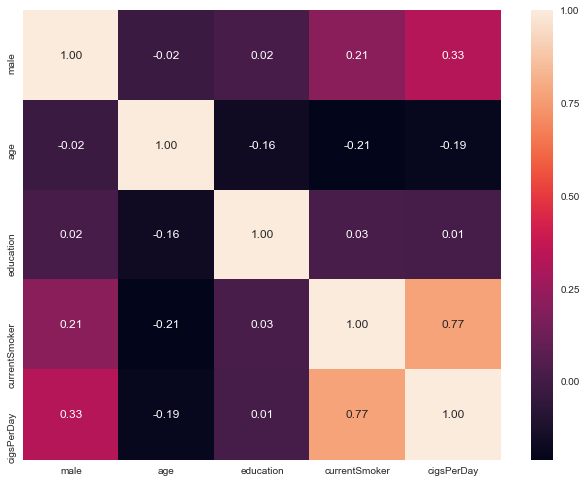

In [88]:
#sns.stripplot(data=social_data, y='age', x='education')
sns.heatmap(social_data.corr(), annot=True, fmt=".2f")

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">توزيع المستوى الدراسي حسب العمر : </span></h3>

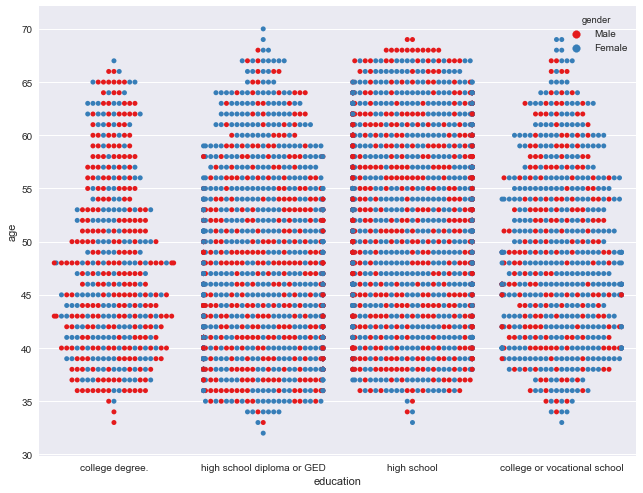

In [111]:
sns.set(rc={'figure.figsize':(10.7,8.27)})

#sns.set_style("whitegrid")
sns.set_palette("Set1")


sns.swarmplot(data=cat_social_data, y='age', x='education',hue=cat_social_data.gender)

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">سلوكيات التدخين لدى الجنسين : </span></h3>

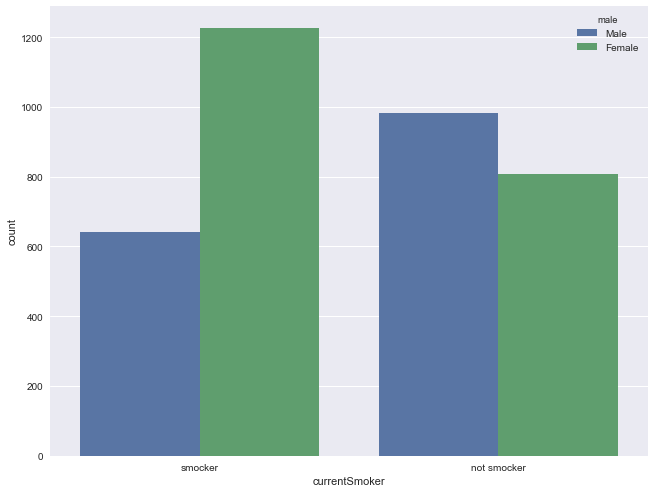

In [87]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.countplot( cat_social_data.currentSmoker,hue=cat_social_data.male)

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">المستوى الدراسي لدى الجنسين : </span></h3>

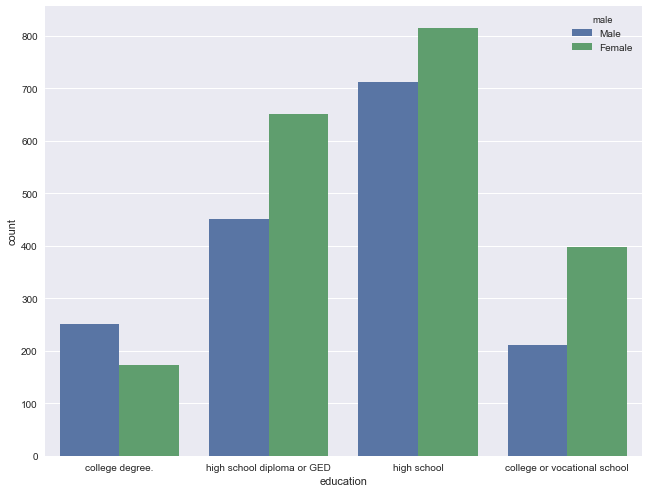

In [85]:
#sns.swarmplot(data=social_data, x='education', y='currentSmoker')
sns.countplot( cat_social_data.education,hue=cat_social_data.male)

<h4 style="direction: rtl; text-align: right;"><strong><span style="color: #339966;">دراسة المؤشرات المتعلقة بصحة القلب :</span></strong></h4>
<h4 style="direction: rtl; text-align: right;">أولاً بناء اطار بيانات للمؤشرات الصحية :&nbsp;</h4>

In [109]:
med_data =DataSet.loc[:,"prevalentStroke":"TenYearCHD"]

<h4 style="direction: rtl; text-align: right;">عينة:&nbsp;</h4>

In [110]:
med_data.sample(4)

,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2848,0,0,0,262.0,113.5,80.0,26.42,75.0,67.0,0
3035,0,0,0,225.0,108.5,73.0,26.55,54.0,73.0,0
923,0,1,0,253.0,159.0,115.0,32.66,110.0,74.0,0
40,0,0,0,243.0,116.5,80.0,26.87,68.0,78.0,0


<h2 id="تحليل-الإرتباط-بين-بيانات-العينات" style="direction: rtl; text-align: right;"><span style="color: #000080;">تحليل الإرتباط بين البيانات الطبية</span></h2>


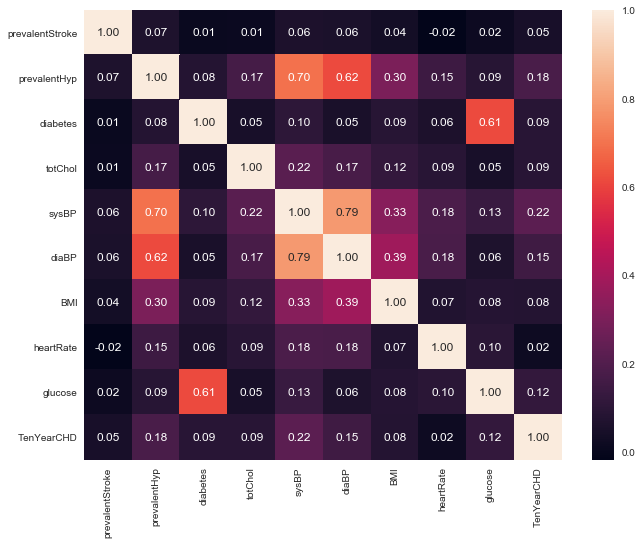

In [108]:
sns.heatmap(med_data.corr(), annot=True, fmt=".2f")

In [ ]:

fig = sns.jointplot(x="diabetes" , y="age", data=DataSet, size=8);
plt.show()